In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Breast_Cancer.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

class 2 means patient has breast cancer ,
 class 4 means patient does not have breast cancer.

In [6]:
x = df.iloc[:,1:-1]
y = df["Class"]

first i separate independent and dependent column into x and y.

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

then i devide data into training and testing

# Model building

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [9]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           2       0.97      1.00      0.99       111
           4       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [19]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       111
           4       0.96      0.90      0.93        60

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [21]:
knn = DecisionTreeClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       111
           4       0.97      0.93      0.95        60

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [22]:
from sklearn.neighbors import KNeighborsClassifier
cc=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    cc.append(accuracy_score(ytest,ypred))
    
cc

[0.9707602339181286,
 0.9415204678362573,
 0.9824561403508771,
 0.9766081871345029,
 0.9941520467836257,
 0.9883040935672515,
 1.0,
 0.9941520467836257,
 0.9941520467836257,
 0.9883040935672515,
 0.9883040935672515,
 0.9824561403508771,
 0.9883040935672515,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9766081871345029,
 0.9824561403508771,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029]

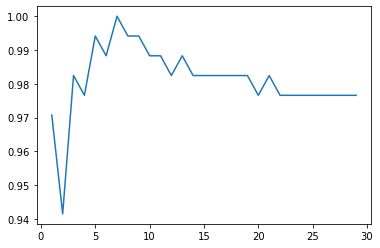

In [23]:
plt.plot(range(1,30),cc)
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
accuracy_score(ytest,ypred)

1.0

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       111
           4       1.00      1.00      1.00        60

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



Here we got 100 % accuracy at predicting cancer.